# Import Libraries

In [1]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import datetime as dt
import time

Using TensorFlow backend.
/home/auyongcs/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/auyongcs/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/auyongcs/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/auyongcs/anaconda3/lib/python3.6/site-packag

# Set Up Data Pipelines and Clean Data

In [2]:
tweets = pd.read_csv("HK_df.csv", encoding = "ISO-8859-1")

In [3]:
tweets.drop(columns = 'Unnamed: 0')
tweets.drop(columns = 'Country')

,Unnamed: 0,Text,Date,Retweets,Verified
0,1,EXCLUSIVE: Chinese virologist accuses Beijing ...,2020-07-12,2,False
1,2,@Lady_RBF @jen_myPsalms182 @GregAbbott_TX I tr...,2020-07-07,0,False
2,3,Australians at risk of arbitrary detention i...,2020-07-07,0,False
3,4,@EnesKanter @espn https://t.co/3qI3LcIppm\r\nh...,2020-07-12,0,False
4,5,Hong Kong is a warning to the world that democ...,2020-07-07,0,False
...,...,...,...,...,...
6995,6996,@JoeBiden So.... Joe Biden wants to Trust Chin...,2020-07-10,0,False
6996,6997,@CorbynFollies China's plan is straight forwar...,2020-07-09,0,False
6997,6998,Hong Kong's civil servants will not be allowed...,2020-07-11,0,False
6998,6999,@KingJames How about Hong Kong! Ur a complete...,2020-07-12,0,False


In [4]:
tweets['Date'] = pd.to_datetime(tweets['Date'])

In [5]:
tweets.head(3)

,Unnamed: 0,Text,Date,Retweets,Verified,Country
0,1,EXCLUSIVE: Chinese virologist accuses Beijing ...,2020-07-12,2,False,NaN
1,2,@Lady_RBF @jen_myPsalms182 @GregAbbott_TX I tr...,2020-07-07,0,False,NaN
2,3,Australians at risk of arbitrary detention i...,2020-07-07,0,False,NaN


# Analysis with Vader

In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [7]:
sentiment = tweets['Text'].apply(lambda x: analyzer.polarity_scores(x))
tweets = pd.concat([tweets,sentiment.apply(pd.Series)],1)

In [12]:
tweets

,Unnamed: 0,Text,Date,Retweets,Verified,Country,neg,neu,pos,compound,mean,rolling
Date,,,,,,,,,,,,
2020-07-06,3390,We should cut a deal with China. We will take ...,2020-07-06,0,False,NaN,0.118,0.740,0.142,0.2023,0.202300,0.202300
2020-07-06,2298,"""For businesses based in Hong Kong, a key ques...",2020-07-06,0,False,NaN,0.074,0.822,0.104,0.0258,0.114050,0.114050
2020-07-06,5785,"Flee from Hong Kong, the to be destroyed! http...",2020-07-06,0,False,NaN,0.304,0.696,0.000,-0.5411,-0.104333,-0.104333
2020-07-06,2884,@nathanattrill Black is white? Or is this such...,2020-07-06,0,False,NaN,0.000,0.743,0.257,0.9205,0.151875,0.151875
2020-07-06,3221,Sad to see Hong Kong moving in this authoritar...,2020-07-06,2,False,NaN,0.237,0.763,0.000,-0.4767,0.026160,0.026160
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-12,830,Agreed.\r\n\r\nNow do Hong Kong. https://t.co/...,2020-07-12,0,False,NaN,0.000,0.704,0.296,0.2732,0.041930,0.063498
2020-07-12,831,Good point! I dont hear @HawleyMO protesting ...,2020-07-12,0,False,NaN,0.090,0.807,0.103,0.1007,0.041938,0.063539
2020-07-12,5475,Advanced Higher Modern Studies pupils <U+0001F...,2020-07-12,1,False,NaN,0.000,0.812,0.188,0.5267,0.042007,0.064051


In [9]:
tweets.describe()

,Unnamed: 0,Retweets,neg,neu,pos,compound
count,7000.000000,7000.00000,7000.000000,7000.000000,7000.000000,7000.000000
mean,3500.500000,7.29700,0.086384,0.810172,0.103444,0.042111
std,2020.870275,96.07546,0.102578,0.137365,0.108912,0.473170
min,1.000000,0.00000,0.000000,0.256000,0.000000,-0.973200
25%,1750.750000,0.00000,0.000000,0.720000,0.000000,-0.296000
50%,3500.500000,0.00000,0.054000,0.820000,0.086000,0.000000
75%,5250.250000,0.00000,0.153000,0.909000,0.169000,0.401900
max,7000.000000,4589.00000,0.612000,1.000000,0.744000,0.988400


In [10]:
tweets.sort_values(by='Date', inplace=True)
tweets.index = pd.to_datetime(tweets['Date'])
tweets['mean'] = tweets['compound'].expanding().mean()
tweets['rolling'] = tweets['compound'].rolling('6h').mean()

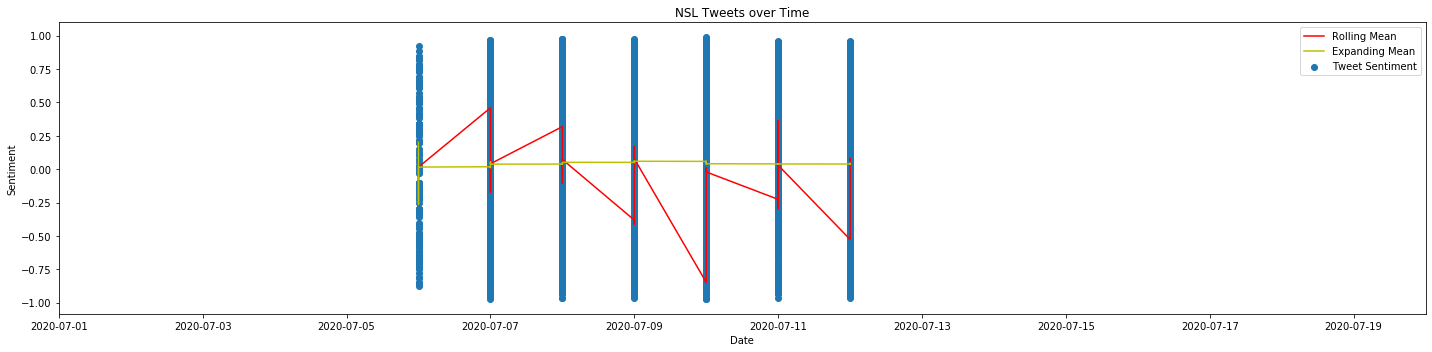

In [16]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.scatter(tweets['Date'],tweets['compound'], label='Tweet Sentiment')
ax.plot(tweets['Date'],tweets['rolling'], color ='r', label='Rolling Mean')
ax.plot(tweets['Date'],tweets['mean'], color='y', label='Expanding Mean')
ax.set_xlim([dt.date(2020,7,1),dt.date(2020,7,20)])
ax.set(title='NSL Tweets over Time', xlabel='Date', ylabel='Sentiment')
ax.legend(loc='best')
fig.tight_layout()
plt.show()